### Data exploration

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
KOTAK = pd.read_csv("Database/reliance.csv")

In [96]:
KOTAK.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,05-Apr-2022,EQ,"2,651.10","2,669.90","2,620.70","2,663.70","2,626.00","2,626.05","2,636.90","2,751.35","1,876.70",6068663,"16,002,466,152.10",204933
1,04-Apr-2022,EQ,"2,655.45","2,675.00","2,641.65","2,655.85","2,660.65","2,663.70","2,658.17","2,751.35","1,876.70",3659307,"9,727,052,260.30",167593
2,01-Apr-2022,EQ,"2,636.00","2,665.15","2,622.00","2,634.75","2,661.00","2,655.85","2,641.48","2,751.35","1,876.70",3656408,"9,658,325,026.60",163060
3,31-Mar-2022,EQ,"2,664.95","2,669.70","2,628.60","2,672.95","2,636.00","2,634.75","2,642.00","2,751.35","1,876.70",6102744,"16,123,465,625.40",249443
4,30-Mar-2022,EQ,"2,639.90","2,688.00","2,617.10","2,622.55","2,658.70","2,672.95","2,661.36","2,751.35","1,876.70",7297028,"19,420,019,029.30",219316


In [97]:
KOTAK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           498 non-null    object
 1   series         498 non-null    object
 2   OPEN           498 non-null    object
 3   HIGH           498 non-null    object
 4   LOW            498 non-null    object
 5   PREV. CLOSE    498 non-null    object
 6   ltp            498 non-null    object
 7   close          498 non-null    object
 8   vwap           498 non-null    object
 9   52W H          498 non-null    object
 10  52W L          498 non-null    object
 11  VOLUME         498 non-null    int64 
 12  VALUE          498 non-null    object
 13  No of trades   498 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 54.6+ KB


In [98]:
KOTAK["Date "] = pd.to_datetime(KOTAK["Date "])
KOTAK["close "] = KOTAK["close "].str.replace(',', '')
KOTAK = KOTAK.astype({"close ": float})

In [99]:
KOTAK.describe()

,close,VOLUME,No of trades
count,498.000000,4.980000e+02,4.980000e+02
mean,2112.290863,1.217099e+07,3.140178e+05
std,312.662004,9.522102e+06,1.783643e+05
min,1149.850000,7.871600e+05,6.328500e+04
25%,1961.237500,5.877447e+06,2.068155e+05
50%,2107.975000,9.243160e+06,2.633685e+05
75%,2363.675000,1.526885e+07,3.677575e+05
max,2731.850000,6.523089e+07,1.428490e+06


Text(0, 0.5, 'Close')

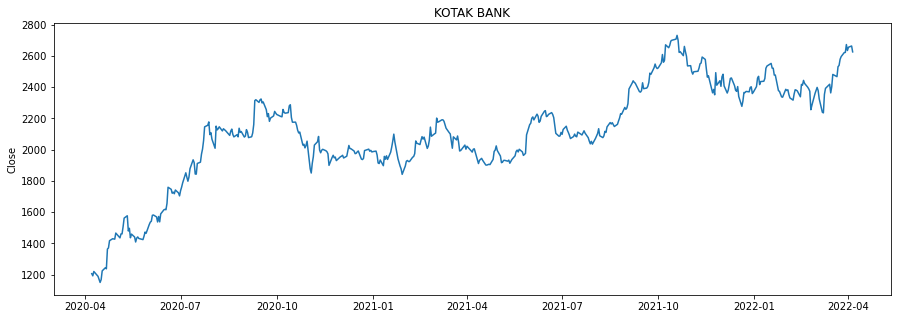

In [100]:
plt.figure(figsize=(15, 5))
plt.plot(KOTAK["Date "], KOTAK["close "])
plt.title('KOTAK BANK')
plt.ylabel('Close')

### LSTM model

In [101]:
def Dataset(Data,train_len,Date):
    Train_Data = Data['close '][Data['Date '] < Date].to_numpy()
    Data_Train = []
    Data_Train_X = []
    Data_Train_Y = []
    for i in range(0, len(Train_Data)):
        try:
            Data_Train.append(Train_Data[i : i + train_len])
        except:
            pass
    
    while len(Data_Train[-1]) < train_len:
        Data_Train.pop(-1)
  
    Data_Train_X = Data_Train[0 : -1]
    Data_Train_X = np.array(Data_Train_X) 
    Data_Train_X = np.reshape(Data_Train_X,(Data_Train_X.shape[0],train_len,1))
    Data_Train_Y = Data_Train[1 : len(Data_Train)]
    Data_Train_Y = np.array(Data_Train_Y)
    Data_Train_Y = Data_Train_Y.reshape(-1, train_len, 1)


    Test_Data = Data['close '][Data['Date '] >= Date].to_numpy()
    Data_Test = []
    Data_Test_X = []
    Data_Test_Y = []
    for i in range(0, len(Test_Data)):
        try:
            Data_Test.append(Test_Data[i : i + train_len])
        except:
            pass

    while len(Data_Test[-1]) < train_len:
        Data_Test.pop(-1)
  
    Data_Test_X = Data_Test[0 : -1]
    Data_Test_X = np.array(Data_Test_X)
    Data_Test_X = np.reshape(Data_Test_X,(Data_Test_X.shape[0],train_len,1))
    Data_Test_Y = Data_Test[1 : len(Data_Test)]
    Data_Test_Y = np.array(Data_Test_Y)
    Data_Test_Y = Data_Test_Y.reshape((-1, train_len, 1))

    return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [102]:
test_Date = '2022-01-01'
Train_X, Train_Y, Test_X, Test_Y = Dataset(KOTAK, 5, test_Date)

In [103]:
Train_X

array([[[2368.15],
        [2359.1 ],
        [2402.5 ],
        [2398.4 ],
        [2370.25]],

       [[2359.1 ],
        [2402.5 ],
        [2398.4 ],
        [2370.25],
        [2372.8 ]],

       [[2402.5 ],
        [2398.4 ],
        [2370.25],
        [2372.8 ],
        [2365.25]],

       ...,

       [[1243.8 ],
        [1224.  ],
        [1168.05],
        [1149.85],
        [1189.15]],

       [[1224.  ],
        [1168.05],
        [1149.85],
        [1189.15],
        [1219.95]],

       [[1168.05],
        [1149.85],
        [1189.15],
        [1219.95],
        [1192.15]]])

In [104]:
Train_Y

array([[[2359.1 ],
        [2402.5 ],
        [2398.4 ],
        [2370.25],
        [2372.8 ]],

       [[2402.5 ],
        [2398.4 ],
        [2370.25],
        [2372.8 ],
        [2365.25]],

       [[2398.4 ],
        [2370.25],
        [2372.8 ],
        [2365.25],
        [2366.1 ]],

       ...,

       [[1224.  ],
        [1168.05],
        [1149.85],
        [1189.15],
        [1219.95]],

       [[1168.05],
        [1149.85],
        [1189.15],
        [1219.95],
        [1192.15]],

       [[1149.85],
        [1189.15],
        [1219.95],
        [1192.15],
        [1206.1 ]]])

### model

In [105]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [106]:
def Model():
    model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
    return model

In [107]:
model = Model()

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 200)            161600    
                                                                 
 lstm_9 (LSTM)               (None, 200)               320800    
                                                                 
 dense_16 (Dense)            (None, 200)               40200     
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-tr

In [109]:
def scheduler(epoch):
    if epoch <= 150:
        lrate = (10 ** -5) * (epoch / 150) 
    elif epoch <= 400:
        initial_lrate = (10 ** -5)
        k = 0.01
        lrate = initial_lrate * math.exp(-k * (epoch - 150))
    else:
        lrate = (10 ** -6)
  
    return lrate

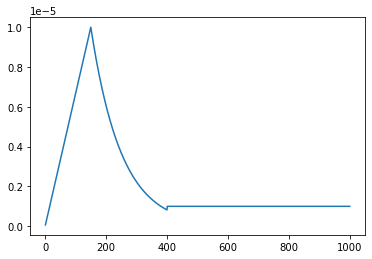

In [110]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [111]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [112]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [113]:
AAPL_hist = model.fit(Train_X, Train_Y, epochs = 1000, validation_data = (Test_X, Test_Y), callbacks=[callback])

Epoch 1/1000
14/14 [==============================] - 25s 141ms/step - loss: 4267592.5000 - root_mean_squared_error: 2065.8154 - val_loss: 5775621.5000 - val_root_mean_squared_error: 2403.2522 - lr: 0.0000e+00
Epoch 2/1000
14/14 [==============================] - 1s 48ms/step - loss: 4267454.0000 - root_mean_squared_error: 2065.7817 - val_loss: 5775031.5000 - val_root_mean_squared_error: 2403.1294 - lr: 6.6667e-08
Epoch 3/1000
14/14 [==============================] - 1s 48ms/step - loss: 4266953.0000 - root_mean_squared_error: 2065.6604 - val_loss: 5773828.5000 - val_root_mean_squared_error: 2402.8792 - lr: 1.3333e-07
Epoch 4/1000
14/14 [==============================] - 1s 49ms/step - loss: 4266018.0000 - root_mean_squared_error: 2065.4341 - val_loss: 5771830.0000 - val_root_mean_squared_error: 2402.4634 - lr: 2.0000e-07
Epoch 5/1000
14/14 [==============================] - 1s 43ms/step - loss: 4264380.0000 - root_mean_squared_error: 2065.0376 - val_loss: 5768679.0000 - val_root_mean_

In [114]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

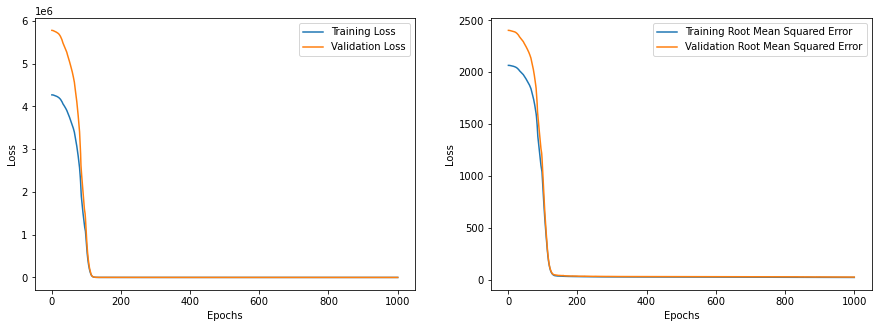

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [116]:
prediction = model.predict(Test_X)

In [117]:
prediction.shape

(59, 5)

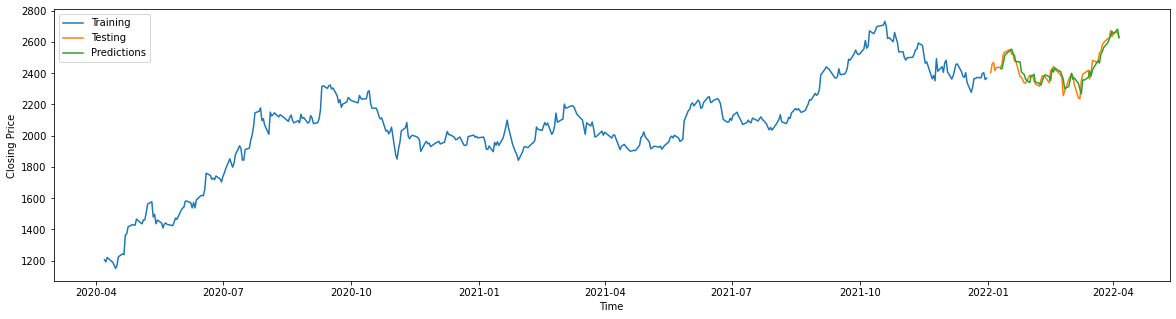

In [118]:
plt.figure(figsize=(20, 5))
plt.plot(KOTAK['Date '][KOTAK['Date '] < '2022-01-01'], KOTAK['close '][KOTAK['Date '] < '2022-01-01'], label = 'Training')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-01-01'], KOTAK['close '][KOTAK['Date '] >= '2022-01-01'], label = 'Testing')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-01-08'], prediction[:,0], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [125]:
# get last 5 day price and feed model to get next 5 day price
x = np.array([[2640.80,2543.85,2551.65,2561.05,2610.20]])

In [126]:
prediction = model.predict(x)

In [127]:
prediction[0]

array([2553.065 , 2551.263 , 2536.2764, 2594.57  , 2603.257 ],
      dtype=float32)

### model 2

In [87]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np

def lstm_model(df,l = 60,n_units = 50):
    df['Date '] = pd.to_datetime(df['Date '],format='%Y-%m-%d')
    df.index = df['Date ']
    
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date ', 'close '])
    
    for i in range(0,len(data)):
        new_data['Date '][i] = data['Date '][i]
        new_data['close '][i] = data['close '][i]
        
    new_data.index = new_data['Date ']
    new_data.drop('Date ', axis=1, inplace=True)
    
    dataset = new_data.values
    
    n = int(new_data.size*0.8)
    
    train = dataset[0:n,:]
    valid = dataset[n:,:]

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    #length of sequence (l) 
    
    x_train, y_train = [], []
    for i in range(l,len(train)):
        x_train.append(scaled_data[i-l:i,0])
        y_train.append(scaled_data[i:i+10,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    model = Sequential()
    model.add(LSTM(units=n_units, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=n_units))
    model.add(Dense(10))
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)
    
    inputs = new_data[len(new_data) - len(valid) - l:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    
    X_test = []
    for i in range(l,inputs.shape[0]):
        X_test.append(inputs[i-l:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    print('rms = '+str(np.sqrt(np.mean(np.power((valid-closing_price),2)))))
    
    train = new_data[:n]
    valid = new_data[n:]
    valid['Predictions'] = closing_price[:,0]
    plt.figure(figsize=(10,7))
    plt.plot(train['close '])
    plt.plot(valid[['close ','Predictions']]) 
    plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
Total params: 31,110
Trainable params: 31,110
Non-trainable params: 0
_________________________________________________________________
None
337/337 [==============================] - 6s 13ms/step - loss: 0.0182
rms = 77.49208569698813
[[0.03609765 0.05868835 0.04525366 0.03848054 0.051623   0.04758705
  0.04802215 0.05642658 0.05269763 0.06064392]
 [0.03534399 0.05757557 0.0441385  0.03763264 0.0508312  0.04670704
  0.04763145 0.05574267 0.0520

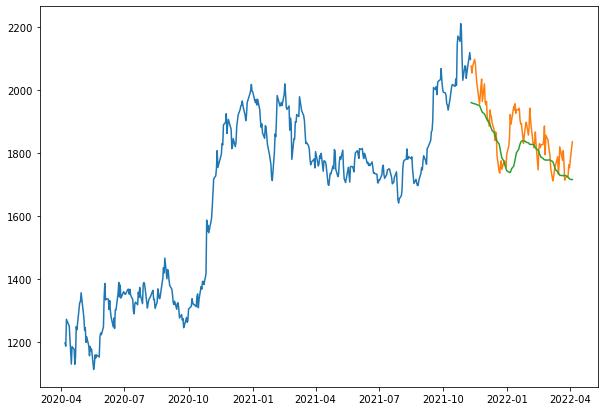

In [88]:
lstm_model(KOTAK,l = 60,n_units = 50)